## From Fibercup, build 3-degree graph. 

From the paper of Transferability of optimal QAOA parameters between random graphs, it says we can do so by "iterating over all edges of initial graph and selecting nodes that are p edges away from the edge"

### Types of 3-degree graph we want to reproduce:

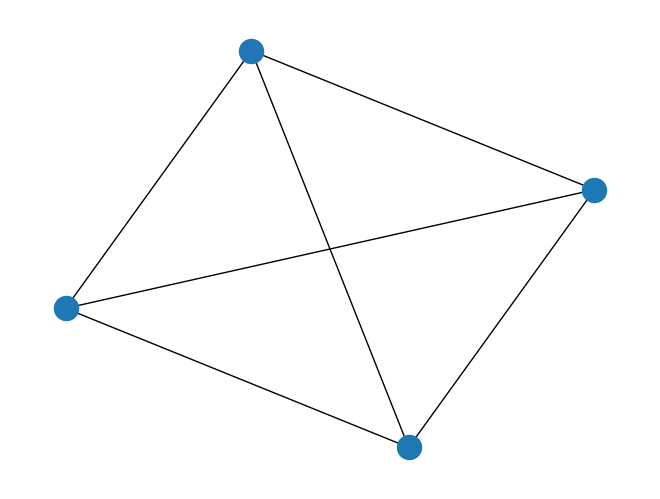

In [2]:
import networkx as nx 
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt

G = nx.random_regular_graph(3, 4)
nx.draw(G)

# or we want for i and j, i and j be connected to three other nodes. 

### Let's take the fibercup and try to extract some 3-degree subgraphs: 

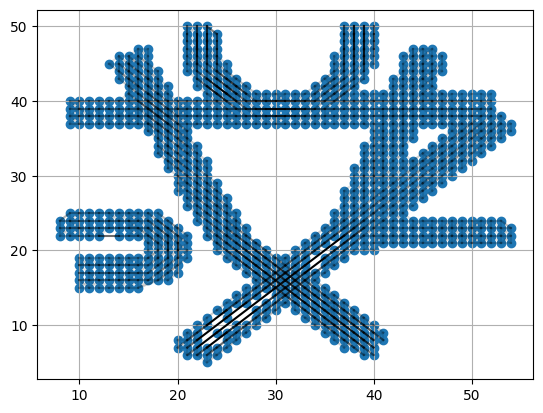

In [27]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from quactography.graph.undirected_graph import Graph
from quactography.adj_matrix.io import load_graph
from quactography.adj_matrix.io import save_graph
from networkx import from_numpy_array 
# from quactography.hamiltonian.hamiltonian_qubit_node import Hamiltonian_qubit_node


# adj_mat = np.array(nx.adjacency_matrix(G).todense())
# my_graph_class = Graph(adj_mat, 1,0)

file = "graph.npz"
weighted_graph, node_indices, vol_dim = load_graph(file)


x, y = np.unravel_index(node_indices, vol_dim)
weighted_graph = np.triu(weighted_graph)

# draw the graph
for it, node_row in enumerate(weighted_graph):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all = node_row[node_row > 0]
        start_x, start_y = x[it], y[it]
        end_x = x[node_row > 0]
        end_y = y[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x, y)
plt.grid(True)

plt.savefig("graph_adj_mat.png")  # Save the plot as a PNG file
plt.show()

### Choose a subgraph and get the smaller adjacency matrix:

[[0.         0.2502549  0.         ... 0.         0.         0.        ]
 [0.         0.         0.29683211 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.22661637 0.        ]
 [0.         0.         0.         ... 0.         0.         0.45713386]
 [0.         0.         0.         ... 0.         0.         0.        ]]


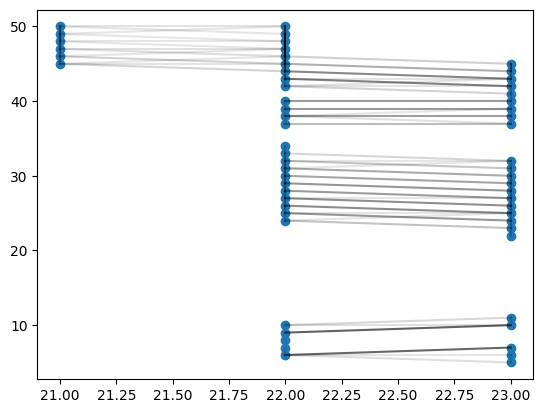

In [78]:

select_1 =230
select_2 =290
num_nodes = select_2-select_1
weighted_graph_selec = weighted_graph[select_1:select_2,select_1:select_2]
print(weighted_graph_selec)
weighted_graph_selec = np.triu(weighted_graph_selec)

x_selec = x[select_1:select_2]
y_selec = y[select_1:select_2]
# draw the graph
for it, node_row in enumerate(weighted_graph_selec):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all_selec = node_row[node_row > 0]
        start_x, start_y = x_selec[it], y_selec[it]
        end_x = x_selec[node_row > 0]
        end_y = y_selec[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all_selec[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x_selec, y_selec)
plt.show()

Choisir un noeud qui a au moins trois connexions, prendre un noeud voisin et prendre deux nouvelles connexions, en faire un graphe:


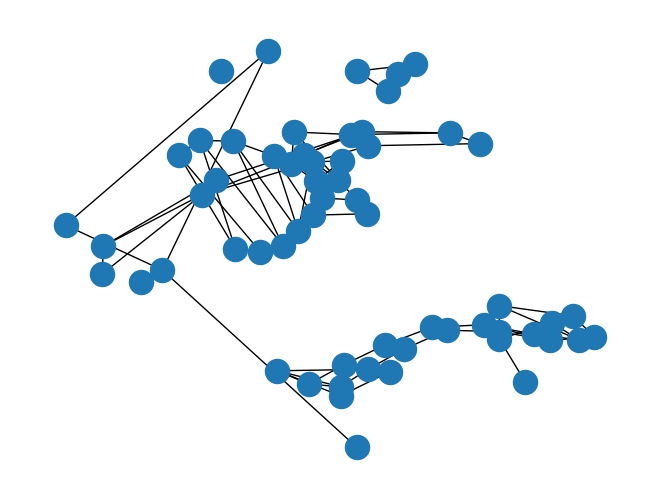

[[0.         0.2502549  0.         ... 0.         0.         0.        ]
 [0.2502549  0.         0.29683211 ... 0.         0.         0.        ]
 [0.         0.29683211 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.22661637 0.        ]
 [0.         0.         0.         ... 0.22661637 0.         0.45713386]
 [0.         0.         0.         ... 0.         0.45713386 0.        ]]


In [79]:
G = from_numpy_array(weighted_graph_selec)
nx.draw(G)
plt.show()
print(nx.adjacency_matrix(G).todense())


In [82]:
# 1) Read rows and columns of numpy matrix, upper triangular
# 2) Look at the number of non-zero element in the row : if length is d, then keep this node
# 3) For a non-zero element in that row, check column index 
# 4) Go to the row of same index and check number of non zero elements
# 5) If d-1 connexions: keep, else, look for another non-zero element from first row and repeat until found
# 6) Change first row if nothing found... and repeat. 